In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

savedir = "D01/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

105

131072
0.0001983642578125


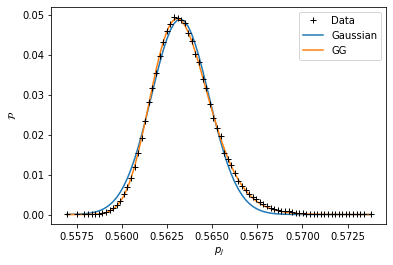

In [30]:
for d in data:
    if( 
        ( d['side'] == 512 )
        and
        ( d['defects_frac'] == 0.2 )
        and
        ( d['gamma'] == 0.4 )
        and
        ( d['dep_polymers'] == 'Squared' )
    ):
        print( d['runned_replicas'] )
        x, y = fitter.rebin_width( d['h_x'], d['h'], 0.0002 )

        fits = fitter.fits( x, y, d, plot=False )

        plt.plot( [], [], '+k', label="Data")

        plt.plot( x, fits['Gauss']['est_y'], label="Gaussian" )
        plt.plot( x, fits['GG']['est_y'], label="GG" )

        plt.plot( x, y, '+k' )

        plt.legend()
        plt.xlabel(fr"$p_j$")
        plt.ylabel(fr"$\mathcal{{P}}$")

        plt.savefig( savedir + "ungauss.pdf" )
        x = np.array( x )
        print( min( x[1:] - x[:-1] ) )

In [4]:
for d in data:
    x, y = fitter.rebin_width( d['h_x'], d['h'], 0.0002 )
    d['fits'] = fitter.fits( x, y, d, plot=False )
    d['kurt'] = kurtosis( d['chunks'] )

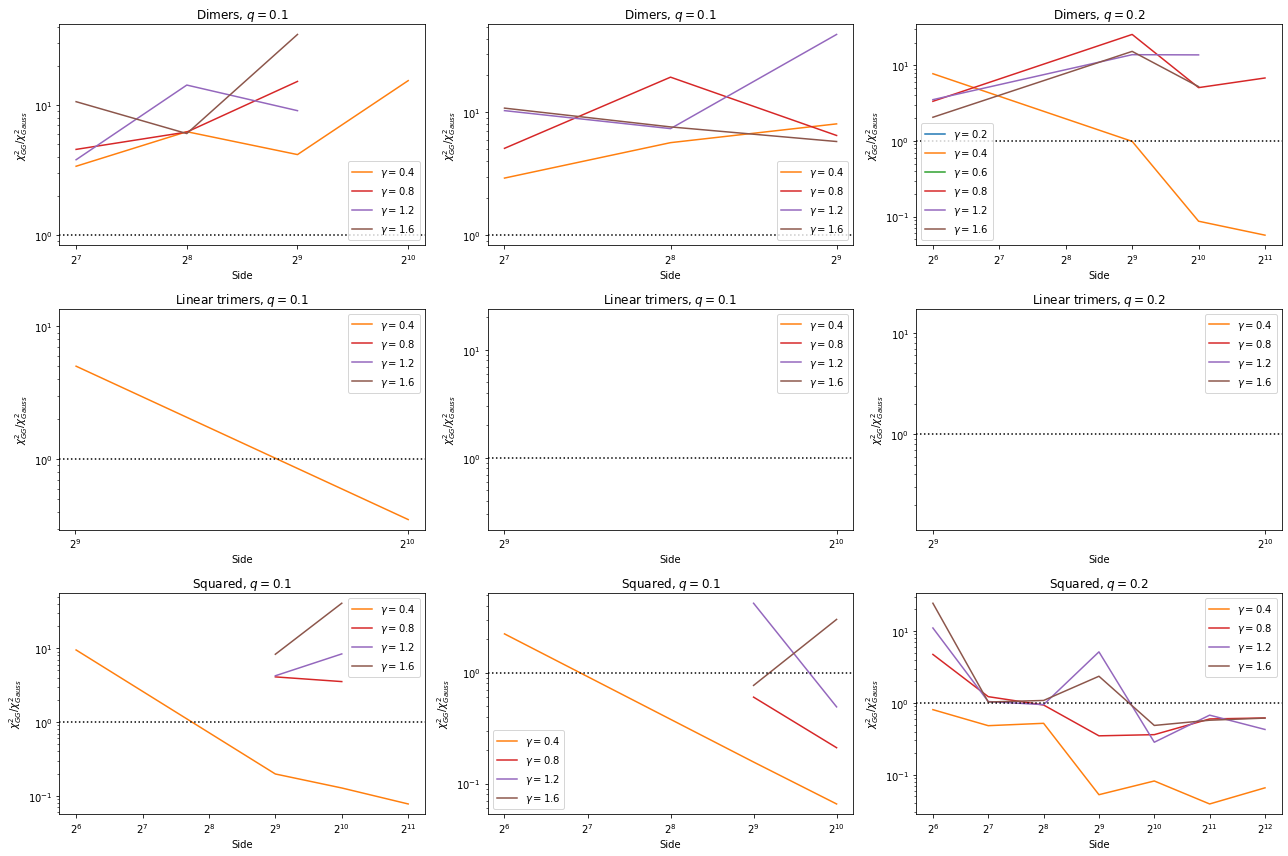

In [29]:
filtered_data = data[ np.vectorize( lambda d: d['defects_frac'] < 0.3 )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['fits']['GG']['chi2'] / filtered_data[d]['fits']['Gauss']['chi2'],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c:.1f}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\chi^2_{{GG}} / \chi^2_{{Gauss}}$" ),
        splt.hline( 1 )
        # plt.xlim( 2**6 * 0.8, 2**11 * 1.2 )
    )
)

plt.tight_layout()
plt.savefig( savedir + "chi2ratio.pdf" )

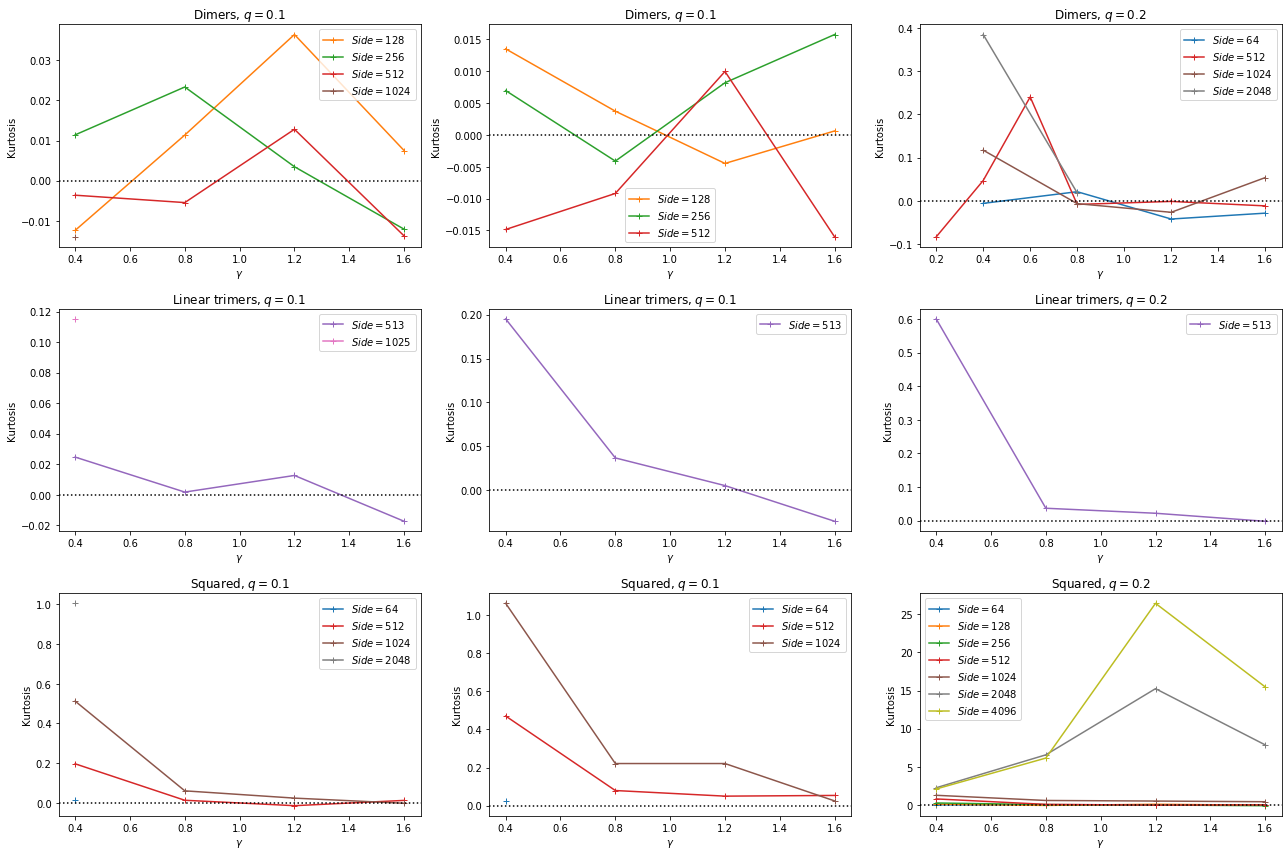

In [28]:
filtered_data = data[ np.vectorize( lambda d: d['defects_frac'] < 0.3 )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['side'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['kurt'],
    ],
    lambda r, c, l: [
        { 'label': fr"$Side = {l:.0f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c:.1f}$" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"Kurtosis" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "kurtosis.pdf" )